# Anomalies detection

In [72]:
%matplotlib inline 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
plt.style.use('fivethirtyeight')

In [73]:
# get data frame
global_data = pd.read_csv('egc2024/timeseries/global.csv')
global_data

,Unnamed: 0,year,month,day,total_fee,total_received_satoshi,total_sent_satoshi,mean_fee_satoshi,mean_feeUSD,mean_fee_for100,nb_transactions,nb_payments,mean_nb_inputs,mean_nb_outputs,nb_mining,total_mining_satoshi,newly_created_coins,self_spent_satoshi,total_received,volume_without_self
0,2015-01-01,2015,1,1,801373971,45473028339385,45058028339385,13609.829337,4.284054e+06,0.799999,58882,161194,2.595241,2.737577,166,415801373971,415000000000,2757774885900,45473028339385,42715253453485
1,2015-01-02,2015,1,2,1159934218,73370568521080,72955568521080,14978.682808,4.732406e+06,0.778933,77439,257633,2.715557,3.326915,166,416159934218,415000000000,4316724676318,73370568521080,69053843844762
2,2015-01-03,2015,1,3,1196476043,82635189454578,82220189454578,14304.385766,4.086009e+06,0.797419,83644,295618,2.781885,3.534240,166,416196476043,415000000000,5584584356557,82635189454578,77050605098021
3,2015-01-04,2015,1,4,2159195328,115159442449532,114726942449532,25138.199015,6.619757e+06,0.899054,85893,280288,2.770133,3.263223,173,434659195328,432500000000,6554587956125,115159442449532,108604854493407
4,2015-01-05,2015,1,5,1608443040,112439228285641,112051728285641,16955.609622,4.662858e+06,0.898594,94862,286552,2.954471,3.020725,155,389108443040,387500000000,5063695492444,112439228285641,107375532793197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,2017-06-26,2017,6,26,35993152232,375012739382430,374842739382430,145080.443192,3.520181e+08,2.771988,248091,626222,2.565329,2.524163,136,205993152232,170000000000,14151200557043,375012739382430,360861538825387
908,2017-06-27,2017,6,27,38384859820,287624055555912,287452805555912,142346.452989,3.601857e+08,3.044288,269658,747924,2.314862,2.773602,137,209634859820,171250000000,19821969138631,287624055555912,267802086417281
909,2017-06-28,2017,6,28,38663204682,282904720130478,282717220130478,140744.451983,3.606988e+08,2.884102,274705,686018,2.471178,2.497290,150,226163204682,187500000000,10958737629631,282904720130478,271945982500847
910,2017-06-29,2017,6,29,33153365173,317698686929569,317543686929569,144453.442667,3.669758e+08,2.760877,229509,570680,2.451838,2.486526,124,188153365173,155000000000,16909883109542,317698686929569,300788803820027


In [74]:
# removing unecessary data
global_data = global_data.drop(['year',	'month', 'day', 'total_received_satoshi', 'total_fee', 'total_sent_satoshi', 'mean_fee_satoshi', 'mean_feeUSD', 'mean_fee_for100', 'nb_payments', 'mean_nb_inputs', 'mean_nb_outputs', 'nb_mining', 'newly_created_coins', 'self_spent_satoshi', 'total_received', 'volume_without_self'], axis=1)
global_data = global_data.rename(columns={ global_data.columns[0]: "date" })
global_data['date'] = pd.to_datetime(global_data['date'])
global_data

,date,nb_transactions,total_mining_satoshi
0,2015-01-01,58882,415801373971
1,2015-01-02,77439,416159934218
2,2015-01-03,83644,416196476043
3,2015-01-04,85893,434659195328
4,2015-01-05,94862,389108443040
...,...,...,...
907,2017-06-26,248091,205993152232
908,2017-06-27,269658,209634859820
909,2017-06-28,274705,226163204682
910,2017-06-29,229509,188153365173


In [75]:
# get the overview of our data
global_data.describe()

,nb_transactions,total_mining_satoshi
count,912.000000,9.120000e+02
mean,197946.012061,3.097439e+11
std,72578.218717,8.976175e+10
min,58882.000000,1.501451e+11
25%,125391.000000,2.097130e+11
50%,208736.500000,3.453659e+11
75%,248158.250000,3.826720e+11
max,375231.000000,5.335712e+11


<Axes: xlabel='total_mining_satoshi', ylabel='Density'>

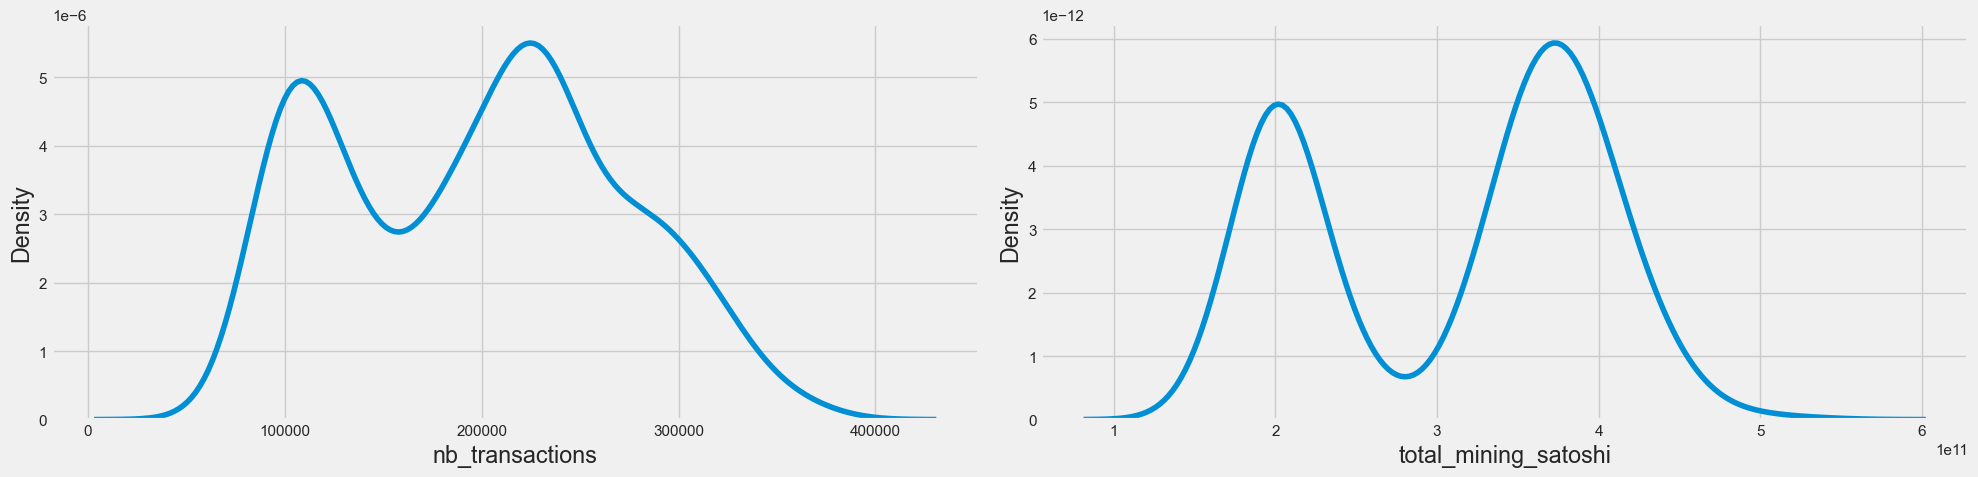

In [76]:
plt.rcParams["figure.figsize"] = [20, 5]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(1,2)
sns.kdeplot(global_data['nb_transactions'], ax=ax[0])
sns.kdeplot(global_data['total_mining_satoshi'], ax=ax[1])

Text(0.5, 1.0, 'Transactions per day')

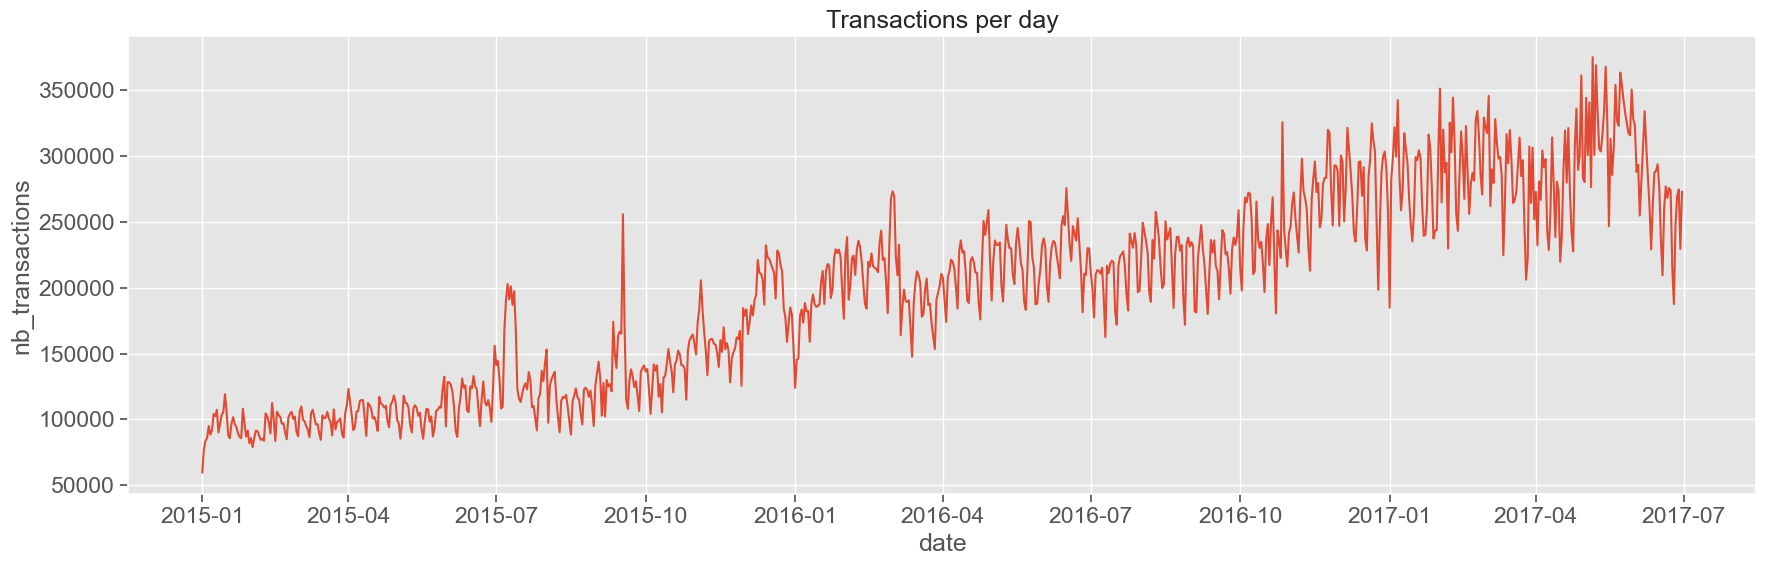

In [78]:
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

g = plt.subplots(figsize=(18, 6))
g = sns.lineplot(x='date', y='nb_transactions', data=global_data)
plt.title('Transactions per day')

Text(0.5, 1.0, 'Transactions per day')

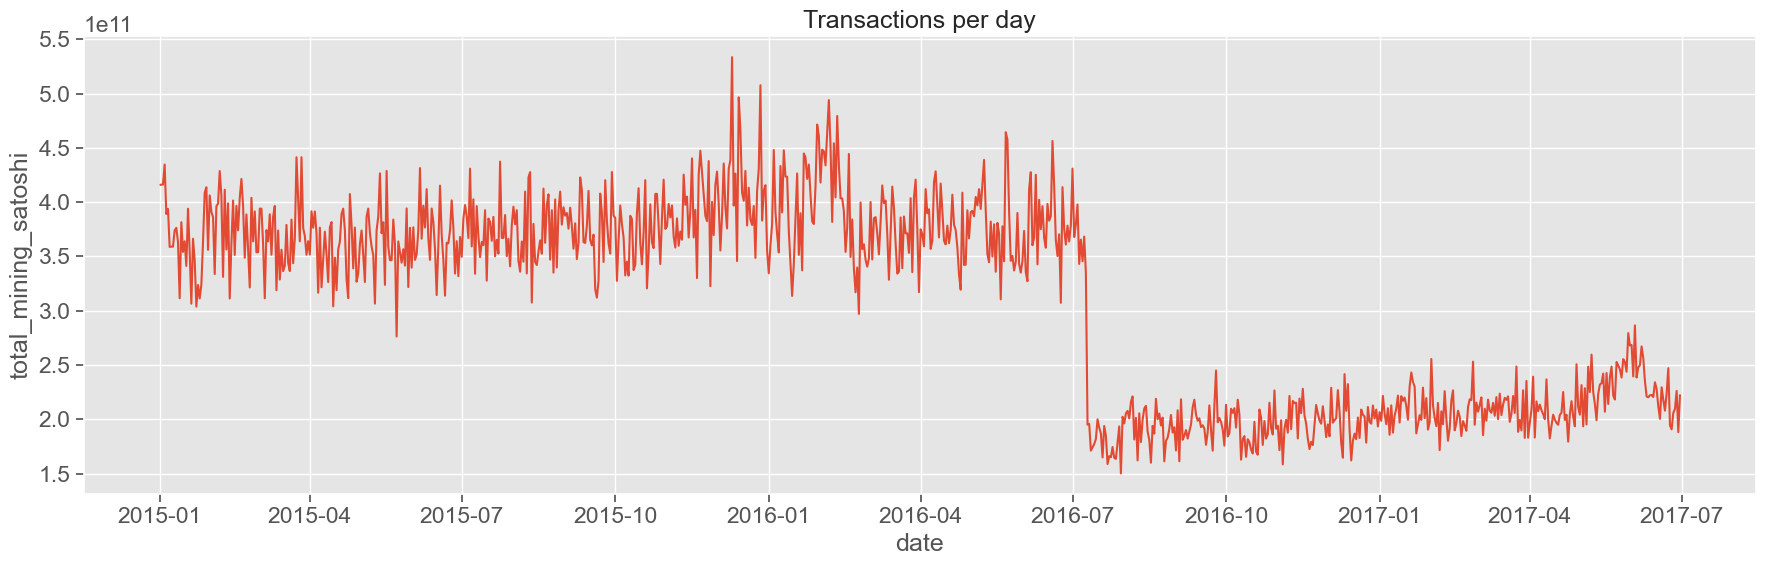

In [79]:
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

g = plt.subplots(figsize=(18, 6))
g = sns.lineplot(x='date', y='total_mining_satoshi', data=global_data)
plt.title('Transactions per day')

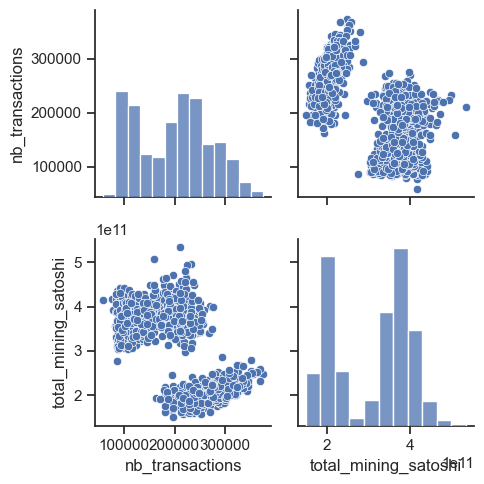

In [80]:
# check the relation among the features of data
sns.set(style="ticks")
sns.pairplot(global_data)

Isolation Forests is a ML algorithm based on decision trees. And since there are no pre-defined labels here, it is an unsupervised model. IsolationForests were built based on the fact that anomalies are the data points that are "few and different". 

Algorithm :
1. When given a dataset, a random sub-sample of the data is selected and assigned to a binary tree.
2. Branching of the tree starts by selecting a random feature (from the set of all N features) first. And then branching is done on a random threshold (any value in the range of minimum and maximum values of the selected feature).
3. If the value of a data point is less than the selected threshold, it goes to the left branch else to the right. And thus a node is split into left and right branches.
4. This process from step 2 is continued recursively till each data point is completely isolated or till max depth (if defined) is reached.
5. The above steps are repeated to construct random binary trees
6. After an ensemble of isolation trees is created, model training is complete. During scoring, a data point is traversed through all the trees which were trained earlier. Now, an "anomaly score" is assigned to each of the data points based on the depth of the tree required to arrive at that point. This score is an aggregation of the depth obtained from each of the trees. An anomaly score of -1 is assigned to anomalies and 1 to normal points based on the contamination (percentage of anomalies present in the data) parameter provided.

In [81]:
# select the three most important features (Transactions, Blocks, Output Satoshis) from the data
data = global_data[['total_mining_satoshi','nb_transactions']]
outliers_fraction=0.05
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)

# train isolation forest
model = IsolationForest(contamination=outliers_fraction)
model.fit(data)

IsolationForest(contamination=0.05)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.92, 'Transactions vs Satoshis: Red represents Anomalies')

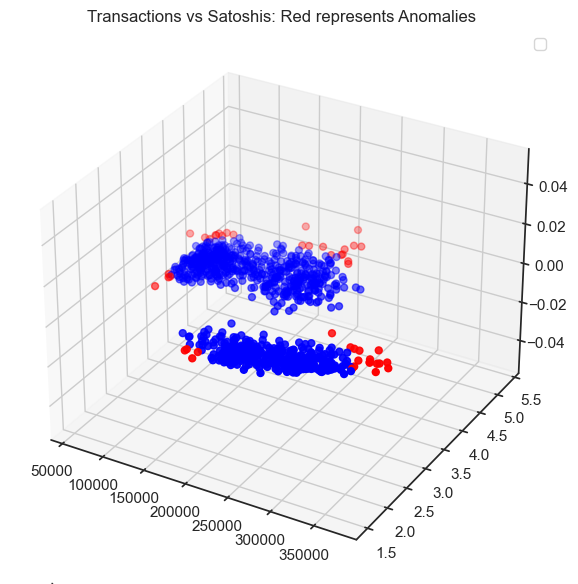

In [82]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111,projection='3d')
X = global_data.iloc[:,1:3].values
colors = np.array(['red', 'blue'])
y_pred = model.fit_predict(data)
ax.scatter(X[:, 0], X[:, 1], s=25, color=colors[(y_pred + 1) // 2] )
ax.legend()
#plt.xlabel('Transactions')
#plt.ylabel('Blocks')
#plt.zlabel('Sum of Output Satoshis')
plt.title('Transactions vs Satoshis: Red represents Anomalies')



In [83]:
# create a new column for storing the results of Isolation Forest method
global_data['anomaly_IsolationForest'] = pd.Series(model.predict(data))
global_data['anomaly_IsolationForest'] = global_data['anomaly_IsolationForest'].apply(lambda x: x == -1)
global_data['anomaly_IsolationForest'] = global_data['anomaly_IsolationForest'].astype(int)
global_data['anomaly_IsolationForest'].value_counts()

0    866
1     46
Name: anomaly_IsolationForest, dtype: int64

In [92]:
global_data

,date,nb_transactions,total_mining_satoshi,anomaly_IsolationForest
0,2015-01-01,58882,415801373971,1
1,2015-01-02,77439,416159934218,1
2,2015-01-03,83644,416196476043,1
3,2015-01-04,85893,434659195328,1
4,2015-01-05,94862,389108443040,0
...,...,...,...,...
907,2017-06-26,248091,205993152232,0
908,2017-06-27,269658,209634859820,0
909,2017-06-28,274705,226163204682,0
910,2017-06-29,229509,188153365173,0


In [93]:

a = global_data.loc[global_data['anomaly_IsolationForest'] == 1]
a

,date,nb_transactions,total_mining_satoshi,anomaly_IsolationForest
0,2015-01-01,58882,415801373971,1
1,2015-01-02,77439,416159934218,1
2,2015-01-03,83644,416196476043,1
3,2015-01-04,85893,434659195328,1
22,2015-01-23,89331,303830771770,1
24,2015-01-25,85675,311313613049,1
36,2015-02-06,84459,428653055237,1
82,2015-03-24,92286,441364850227,1
85,2015-03-27,100597,441409905103,1
129,2015-05-10,90010,306541209423,1


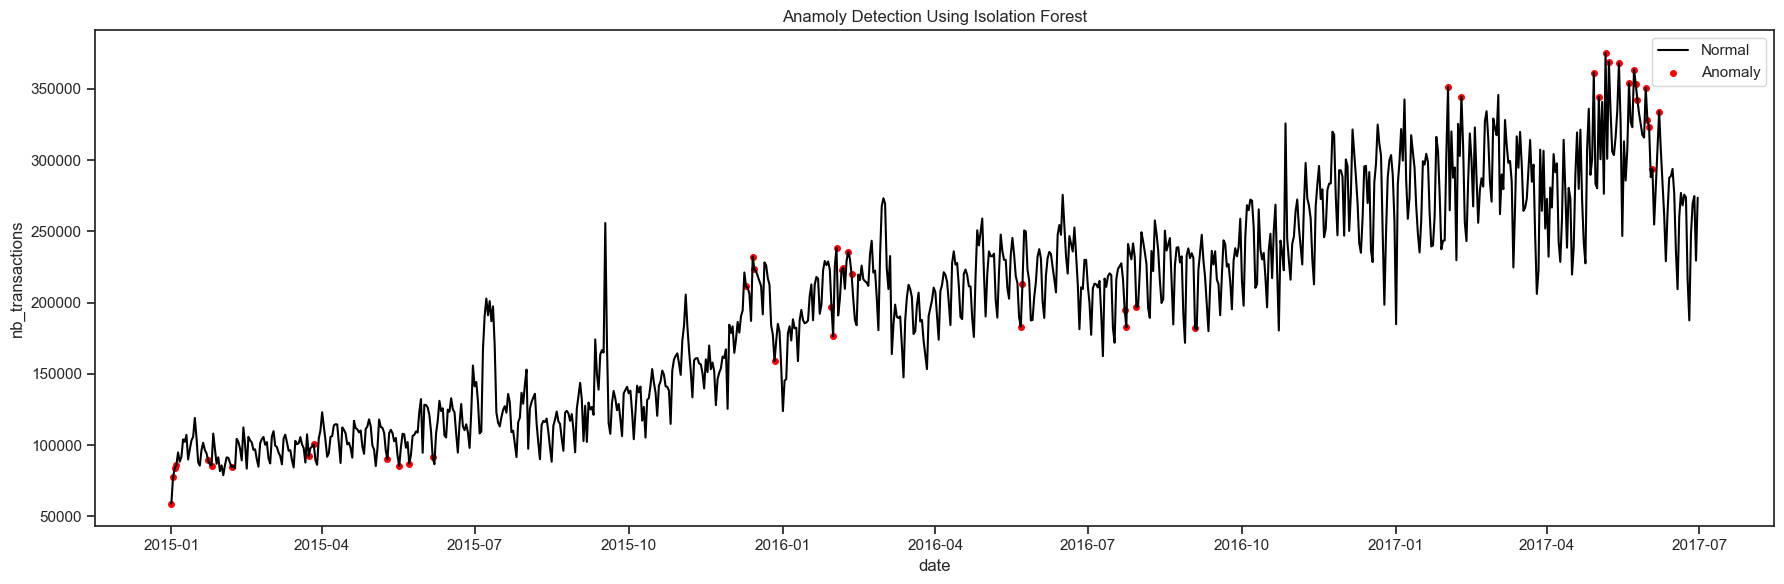

In [96]:
fig, ax = plt.subplots(figsize=(18,6))

a = global_data.loc[global_data['anomaly_IsolationForest'] == 1]
ax.plot('date', 'nb_transactions', data=global_data, color='black', label = 'Normal', linewidth=1.5)
ax.scatter('date', 'nb_transactions', data=a, color='red', label = 'Anomaly', s=16)
plt.legend()
plt.title('Anamoly Detection Using Isolation Forest')
plt.xlabel('date')
plt.ylabel('nb_transactions')
plt.show();

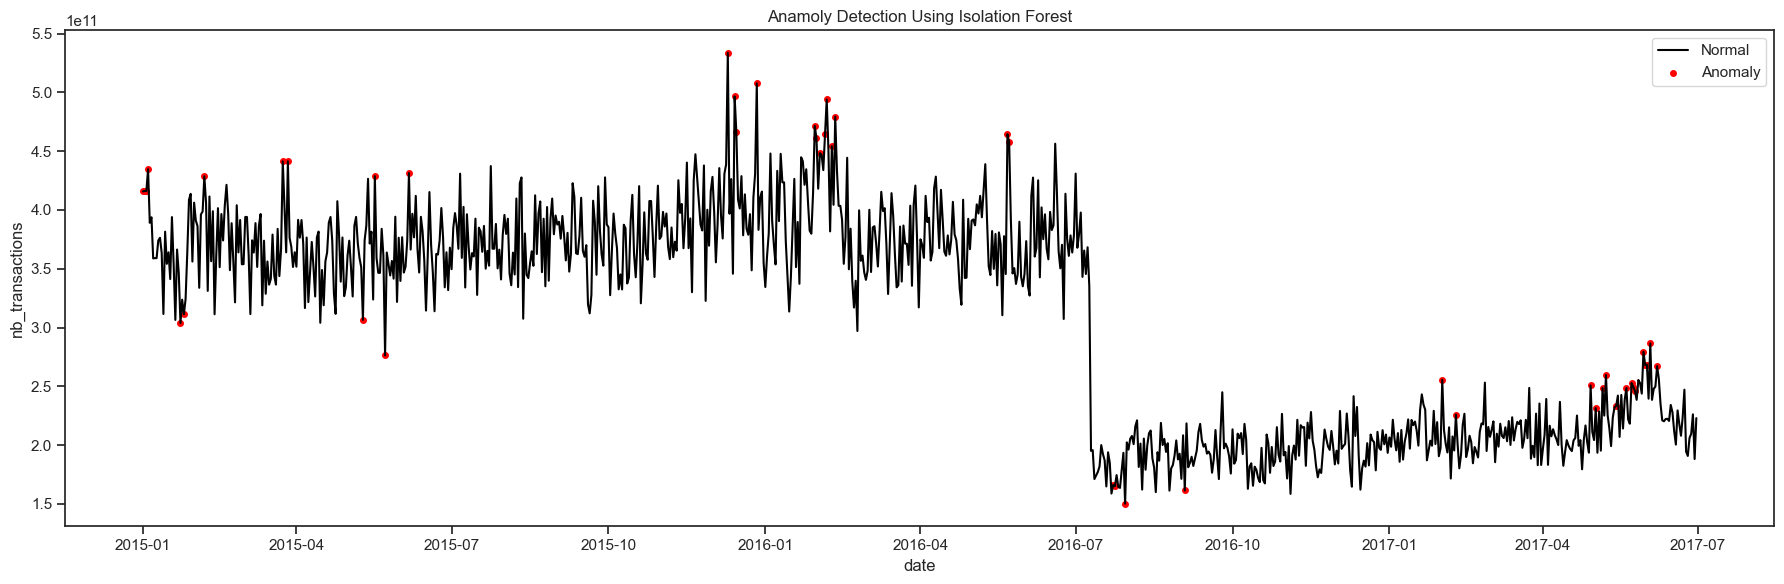

In [97]:
fig, ax = plt.subplots(figsize=(18,6))

a = global_data.loc[global_data['anomaly_IsolationForest'] == 1]
ax.plot('date', 'total_mining_satoshi', data=global_data, color='black', label = 'Normal', linewidth=1.5)
ax.scatter('date', 'total_mining_satoshi', data=a, color='red', label = 'Anomaly', s=16)
plt.legend()
plt.title('Anamoly Detection Using Isolation Forest')
plt.xlabel('date')
plt.ylabel('nb_transactions')
plt.show();